In [36]:
# Loading in dataset
import pandas as pd
import re
netflix_data = pd.read_csv('netflix_titles.csv')

# Cleaning Dataset
netflix_data = netflix_data.dropna(subset=['director', 'cast']) 
def clean_actor_names(name):
    return re.sub(r'[^a-zA-Z\s]', '', name)
netflix_data['cast'] = netflix_data['cast'].apply(lambda x: [clean_actor_names(actor) for actor in x.split(', ')])
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"[Ali Suliman, Saleh Bakri, Yasa, Ali AlJabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [38]:
import networkx as nx
B = nx.Graph()

# Add edges between directors and actors
for index, row in netflix_data.iterrows():
    director = clean_actor_names(row['director'])  # Clean director name
    actors = [clean_actor_names(actor) for actor in row['cast']]  # Clean actor names

    for actor in actors:
        B.add_node(director, bipartite=0)  # Directors
        B.add_node(actor, bipartite=1)      # Actors
        B.add_edge(director, actor)       # Add an edge between the director and the actor

# Check the number of nodes and edges
print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")

Number of nodes: 30491
Number of edges: 43086


In [39]:
# Calculate degree centrality for the bipartite graph
degree_centrality = nx.degree_centrality(B)

# Create a DataFrame for directors
centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Centrality'])

# Filter for only directors (bipartite type 0)
directors = [node for node in B.nodes() if B.nodes[node]['bipartite'] == 0]
directors_df = centrality_df[centrality_df['Node'].isin(directors)]

# Sort to find the top directors
top_directors = directors_df.sort_values(by='Centrality', ascending=False).head(10)  # Top 10 directors
print(top_directors)

                    Node  Centrality
6966     Martin Scorsese    0.003969
219     Steven Spielberg    0.003805
7555  Cathy GarciaMolina    0.002952
4101    Don Michael Paul    0.002591
8523      Kunle Afolayan    0.002493
2829     Youssef Chahine    0.002493
4554    Robert Rodriguez    0.002427
1123      Clint Eastwood    0.002361
2252   Quentin Tarantino    0.002361
2961                 McG    0.002329


Graphs of Top 10 Directors

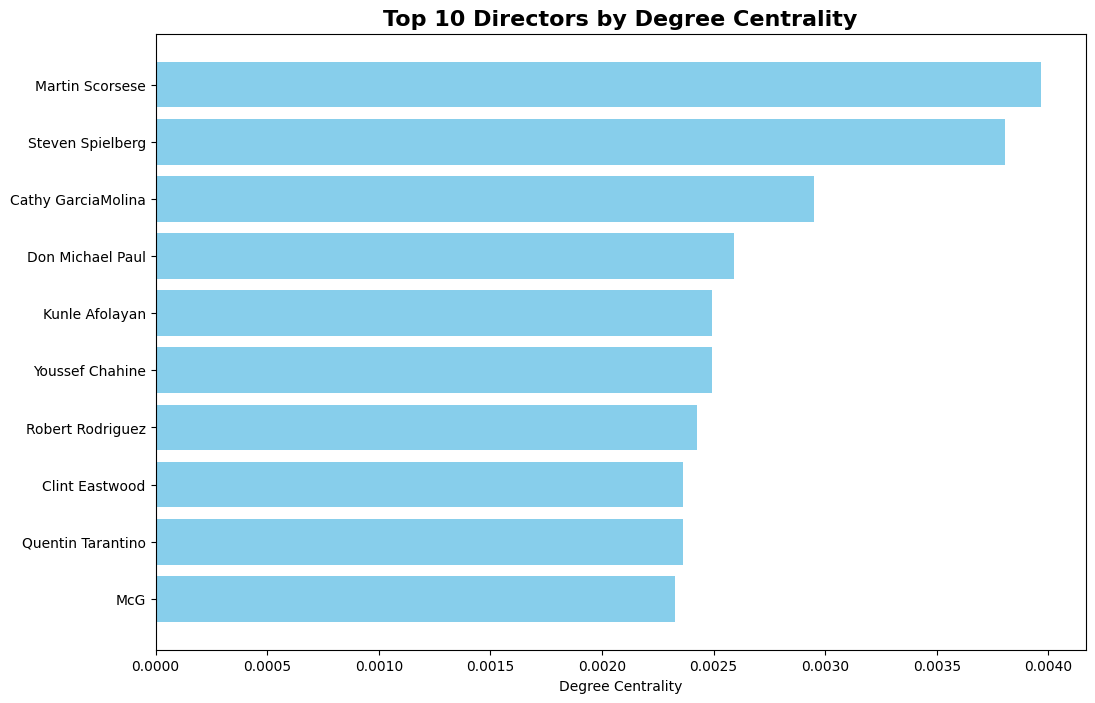

In [49]:
plt.figure(figsize=(12, 8))
plt.barh(top_directors['Node'], top_directors['Centrality'], color='skyblue')
plt.xlabel('Degree Centrality')
plt.title('Top 10 Directors by Degree Centrality', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest centrality on top
plt.show()

In [40]:
# Create a list of top director names
top_director_names = top_directors['Node'].tolist()

# Create a subgraph for the top directors
subgraph_nodes = top_director_names + [actor for actor in B.nodes() if any(B.has_edge(director, actor) for director in top_director_names)]
subgraph = B.subgraph(subgraph_nodes)

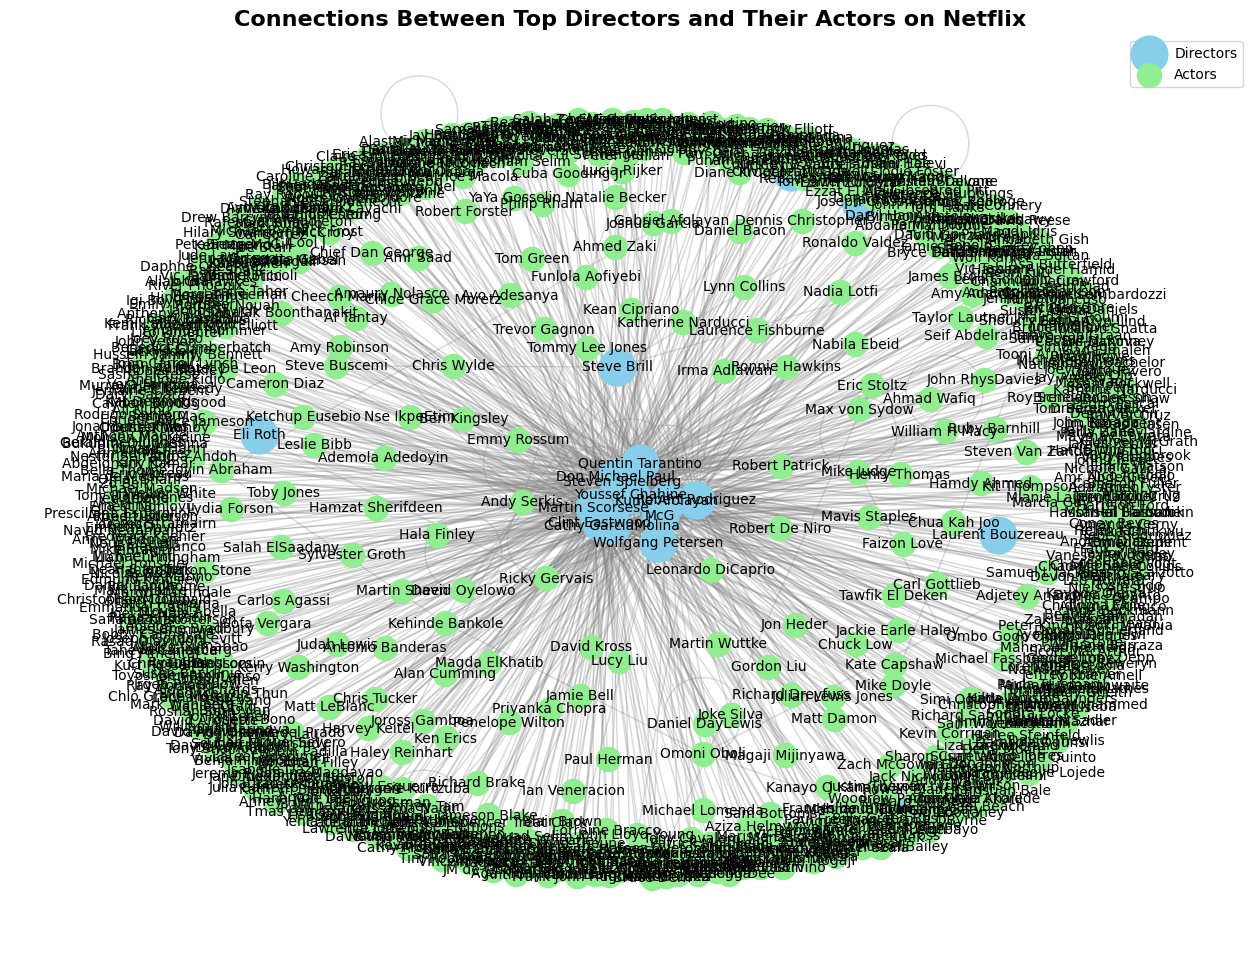

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the bipartite layout
pos = nx.bipartite_layout(subgraph, nodes=[n for n in subgraph.nodes() if subgraph.nodes[n]['bipartite'] == 0])  # Directors

# Adjust positions using spring layout
pos.update(nx.spring_layout(subgraph, k=0.5, iterations=50))

# Set sizes for nodes
director_size = 700  # Size for directors
actor_size = 300     # Size for actors

# Create the figure
plt.figure(figsize=(16, 12))

# Draw nodes for directors and actors
nx.draw_networkx_nodes(subgraph, pos, nodelist=[n for n in subgraph.nodes() if subgraph.nodes[n]['bipartite'] == 0], 
                        node_color='skyblue', node_size=director_size, label='Directors')
nx.draw_networkx_nodes(subgraph, pos, nodelist=[n for n in subgraph.nodes() if subgraph.nodes[n]['bipartite'] == 1], 
                        node_color='lightgreen', node_size=actor_size, label='Actors')

# Draw edges
nx.draw_networkx_edges(subgraph, pos, alpha=0.3, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_family='sans-serif')

# Title and labels
plt.title("Connections Between Top Directors and Their Actors on Netflix", fontsize=16, fontweight='bold')
plt.axis('off')  # Hide axes

# Add a legend
plt.legend(scatterpoints=1, loc='upper right', fontsize=10)

# Show the plot
plt.show()